<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%203/MeiaVida_Bario137.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estrutura da Matéria III

Modalidade: Experimental

Aluna: Úrsula Goulart

Professor: Dr. Wagner de Paula

---

##Experimento 0 - Meia-vida do Bário 137


### Objetivo

Calcular $\lambda$, através de 

$$\boxed{A_t = A_0 \ e^{\lambda t}}$$

Para, posteriormente, calcular a meia-vida do isótopo em questão

$$\boxed{\tau = \lambda \ ln(2) }$$


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Construção da tabela de dados

1. Diferença entre as contagens
2. Como quando fazendo a contagem de eventos recebemos além da radiação da fonte (eventos de sinal), recebemos também a radiação do ambiente (evento de background), é necessário fazermos a diferença entre eles, de modo que fiquemos apenas a contagem de eventos provenientes da fonte. Essa diferença ta sendo chamada de 'TaxaMediaGM' e/ou 'TaxaMediaCintilador'.

    Para GM: 46.1 contagens por minuto
    
    Para o cintilador: 3454.4 eventos por minuto

3. Aplicar função logaritmica na base 10 na taxa média.
4. Remover a primeira linha (Linha nula)


In [60]:
data = pd.read_csv('bario137.csv')

data['DiferencaGM'] = data['GM'].diff()
data.fillna(0, inplace=True)

data['DiferencaCintilador'] = data['Cintilador'].diff()
data.fillna(0, inplace=True)

data['TaxaMediaGM'] = data['DiferencaGM'] - (46.1/3)
data['TaxaMediaCintilador'] = data['DiferencaCintilador'] - (3454.4/3)

#data.at[0, 'TaxaMediaGM'] = 0
#data.at[0, 'TaxaMediaCintilador'] = 0

data['LogTaxaGM'] = np.log(data['TaxaMediaGM'])
data['LogTaxaCintilador'] = np.log(data['TaxaMediaCintilador'])

data = data.drop(data[data.TaxaMediaGM < 0].index)

data.head(16)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Tempo,GM,Cintilador,DiferencaGM,DiferencaCintilador,TaxaMediaGM,TaxaMediaCintilador,LogTaxaGM,LogTaxaCintilador
1,20,419,40782,419.0,40782.0,403.633333,39630.533333,6.000507,10.587355
2,40,766,77879,347.0,37097.0,331.633333,35945.533333,5.804030,10.489760
3,60,1088,111949,322.0,34070.0,306.633333,32918.533333,5.725653,10.401791
4,80,1366,143187,278.0,31238.0,262.633333,30086.533333,5.570759,10.311833
5,100,1589,171580,223.0,28393.0,207.633333,27241.533333,5.335774,10.212498
6,120,1817,197775,228.0,26195.0,212.633333,25043.533333,5.359569,10.128371
7,140,2053,222129,236.0,24354.0,220.633333,23202.533333,5.396502,10.052017
8,160,2256,243868,203.0,21739.0,187.633333,20587.533333,5.234490,9.932441
9,180,2457,264019,201.0,20151.0,185.633333,18999.533333,5.223773,9.852170
10,200,2626,282707,169.0,18688.0,153.633333,17536.533333,5.034569,9.772042


### GM

Após calculado o $\lambda$ é necessário fazer um ajuste não-linear da curva, ajuste exponencial.

In [61]:
def ajuste(x, a, lamb):
  return a * np.exp(lamb * data['Tempo'])

poptgm, pcovgm = curve_fit(ajuste, data['Tempo'], data['TaxaMediaGM'], p0 = (3, -0.001))

In [62]:
poptgm

array([ 4.03283387e+02, -4.60015644e-03])

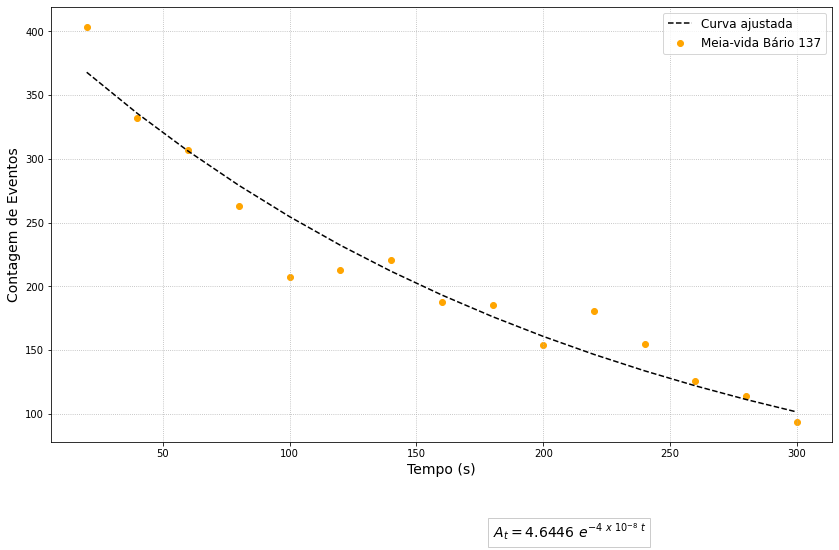

In [63]:
fig, ax = plt.subplots(1, figsize=(14,8))

x_GM = np.linspace(20, 300, num=15)
plt.plot(x_GM, ajuste(x_GM, *poptgm), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data['Tempo'], data['TaxaMediaGM'], c='orange', label='Meia-vida Bário 137')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(180.0, 2.4, '$A_t = 4.6446 \ e^{-4 \ x \ 10^{-8} \ t}$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

###Ajuste Linear

In [64]:
x = data['Tempo']
y = data['LogTaxaGM']

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros1 = lsq_sq(x, y)

y = (-0.004370542590343166 +- 0.00030486761278175904)x +( 5.967878968544946 +- 0.0554378652885861)


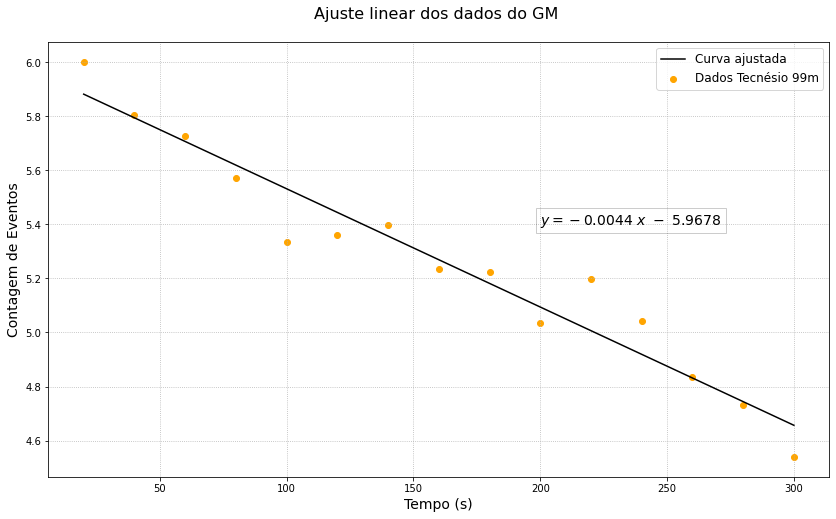

In [65]:
fig, ax = plt.subplots(1, figsize=(14,8))

plt.plot(data['Tempo'], parametros1[0]*data['Tempo']+parametros1[2], c='black', label='Curva ajustada')
plt.scatter(data['Tempo'], data['LogTaxaGM'], c='orange', label='Dados Tecnésio 99m')
plt.title('Ajuste linear dos dados do GM \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(200, 5.4, '$y = -0.0044 \ x \ - \ 5.9678$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

####Meia-vida 

$$t_{1/2} = ln(2) \tau$$ 

$$\sigma_{t_{1/2}}= \sqrt{(ln(2)^2 \cdot (\sigma_{\tau})^2)}$$

In [66]:
tau = abs(1/(parametros1[0]))
erro_tau = (parametros1[1]/parametros1[0]) * tau

meiavida = abs(np.log(2) * tau)
erro_meiavida = np.sqrt(np.power(np.log(2), 2) * np.power(erro_tau, 2))

print(tau, '+-', erro_tau,'\n', meiavida, '+-', erro_meiavida)

228.8045429895884 +- -15.960282590308807 
 158.59522387254 +- 11.062824878412531


### Cintilador

Após calculado o $\lambda$ é necessário fazer um ajuste não-linear da curva, ajuste exponencial.

In [67]:
def ajuste(x, a, lamb):
  return a * np.exp(lamb * data['Tempo'])

poptcintilador, pcovcintilador = curve_fit(ajuste, data['Tempo'], data['TaxaMediaCintilador'], p0 = (5, -0.001))

In [68]:
poptcintilador

array([ 4.32787798e+04, -4.55843581e-03])

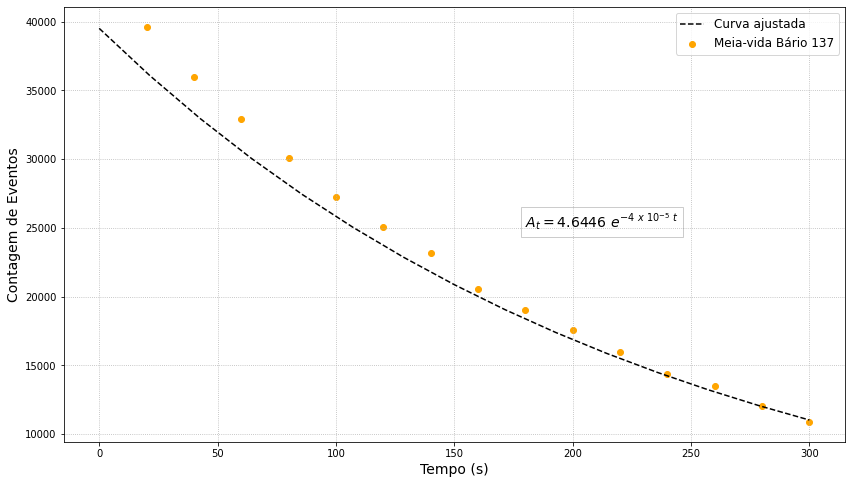

In [69]:
fig, ax = plt.subplots(1, figsize=(14,8))

x_c = np.linspace(0, 300, num=15)
plt.plot(x_c, ajuste(x_c, *poptcintilador), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data['Tempo'], data['TaxaMediaCintilador'], c='orange', label='Meia-vida Bário 137')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(180.0, 25000, '$A_t = 4.6446 \ e^{-4 \ x \ 10^{-5} \ t}$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

###Ajuste Linear


In [70]:
x = data['Tempo']
y = data['LogTaxaCintilador']

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

y = (-0.004561582160544566 +- 2.863523670560127e-05)x +( 10.675851906620048 +- 0.005207100815029184)


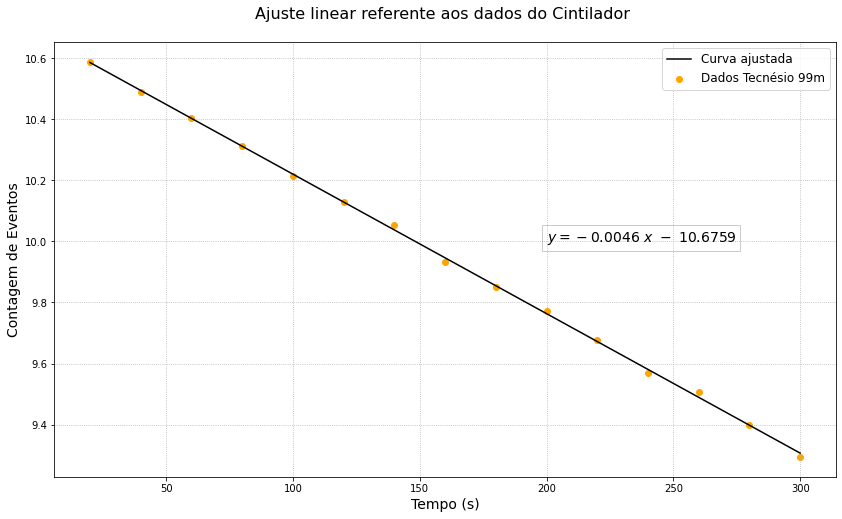

In [71]:
fig, ax = plt.subplots(1, figsize=(14,8))

plt.plot(data['Tempo'], parametros[0]*data['Tempo']+parametros[2], c='black', label='Curva ajustada')
plt.scatter(data['Tempo'], data['LogTaxaCintilador'], c='orange', label='Dados Tecnésio 99m')
plt.title('Ajuste linear referente aos dados do Cintilador \n', fontsize='16')
plt.xlabel('Tempo (s)', fontsize='14')
plt.ylabel('Contagem de Eventos', fontsize='14')
ax.text(200, 10, '$y = -0.0046 \ x \ - \ 10.6759$',fontsize=14, bbox = dict(boxstyle='square', fc='none', ec='black',alpha=0.2))
plt.legend(fontsize='12')
plt.grid(linestyle='dotted')

###Meia Vida

$$t_{1/2} = ln(2) \tau$$ 

$$\sigma_{t_{1/2}}= \sqrt{(ln(2)^2 \cdot (\sigma_{\tau})^2)}$$

In [72]:
tau = abs(1/(parametros[0]))
erro_tau = (parametros[1]/parametros[0]) * tau

meiavida = abs(np.log(2) * tau)
erro_meiavida = np.sqrt(np.power(np.log(2), 2) * np.power(erro_tau, 2))

print(tau, '+-', erro_tau,'\n', meiavida, '+-', erro_meiavida)

219.22218318229721 +- -1.3761626746177802 
 151.95323818900516 +- 0.9538832779031478
